## SUMMARY

* The histogram of number of daily cases were plotted; I tried to fit it with a exponential distribution (To estimate the parameter)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime
from scipy import stats
import scipy.stats as ss


In [2]:
from datetime import datetime
import time

In [3]:
mydata = pd.read_csv('state_traces.csv', index_col=[0])
mydata.head()

,state,date,value
107,NJ,20151002,4293.414810
108,NJ,20151003,5977.121664
109,NJ,20151004,1903.517673
110,NJ,20151005,20754.601160
111,NJ,20151006,12885.652476


In [4]:
mydata['month'] = [str(i)[4:6] for i in mydata.date]
mydata['datestr'] = [(str(i)[:4]+'-' + str(i)[4:6] + '-' + str(i)[6:]) for i in mydata.date]
mydata['dateobj'] = [datetime.strptime(i, "%Y-%m-%d") for i in mydata.datestr]
mydata['timestamp'] = [time.mktime(i.timetuple()) for i in mydata.dateobj]

In [5]:
mydata.head()

,state,date,value,month,datestr,dateobj,timestamp
107,NJ,20151002,4293.414810,10,2015-10-02,2015-10-02,1.443766e+09
108,NJ,20151003,5977.121664,10,2015-10-03,2015-10-03,1.443852e+09
109,NJ,20151004,1903.517673,10,2015-10-04,2015-10-04,1.443938e+09
110,NJ,20151005,20754.601160,10,2015-10-05,2015-10-05,1.444025e+09
111,NJ,20151006,12885.652476,10,2015-10-06,2015-10-06,1.444111e+09


In [6]:
mydata['DOY'] = [time.strftime('%j', time.gmtime(i)) for i in mydata.timestamp]
mydata['DOM'] = [time.strftime('%d', time.gmtime(i)) for i in mydata.timestamp]
mydata['DOW'] = [time.strftime('%w', time.gmtime(i)) for i in mydata.timestamp]
mydata['Week'] = [time.strftime('%U', time.gmtime(i)) for i in mydata.timestamp]

In [9]:
cm = plt.get_cmap('viridis')

In [11]:
plt.rc('axes', prop_cycle=(cycler('color', [cm(1/float(i)) for i in range(1,5)]) ))

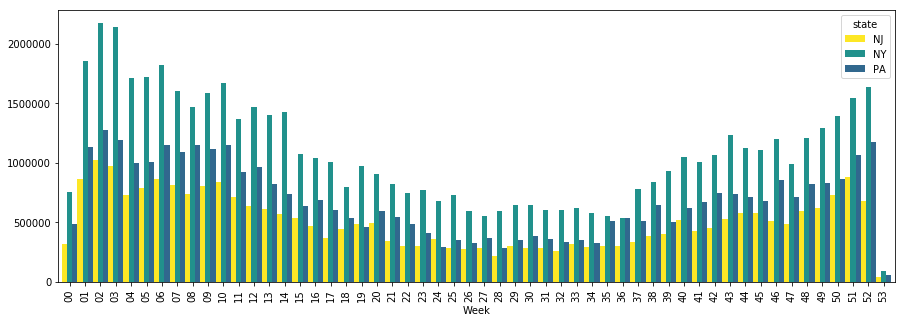

In [19]:
mydata.groupby(['Week', 'state'])['value'].sum().unstack().plot.bar(width = 1)


### Poisson distribution

In [196]:
mydata['year'] = [str(i)[:4] for i in mydata.datestr]
mydoy = mydata.set_index(['state', 'year', 'DOY'])['value'].diff().reset_index()

In [197]:
mydoy.head()

,state,year,DOY,value
0,NJ,2015,275,NaN
1,NJ,2015,276,1683.706854
2,NJ,2015,277,-4073.603991
3,NJ,2015,278,18851.083487
4,NJ,2015,279,-7868.948684


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


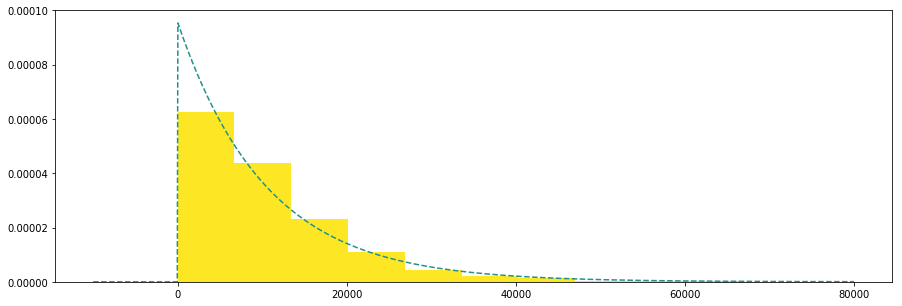

In [198]:
x = mydoy.value[mydoy.value >0]
plt.hist(x, normed=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(x))
p_fit = ss.expon.fit(x)
rp = ss.expon.pdf(lnspc, *p_fit)
plt.plot(lnspc, rp, ls = '--')
plt.show()


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


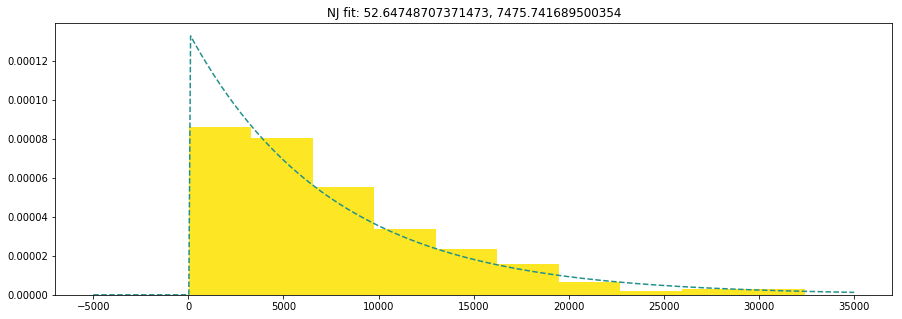

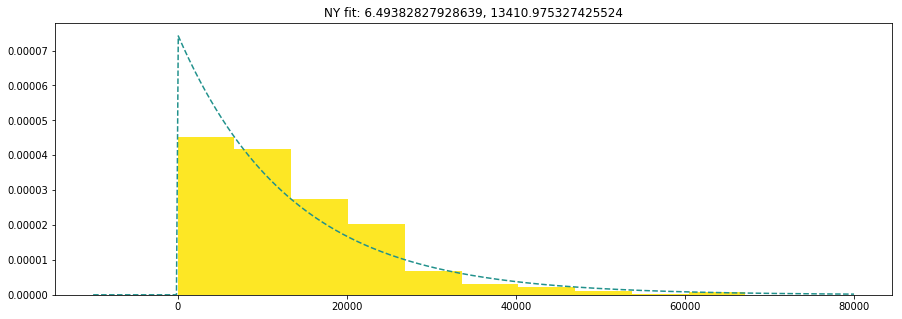

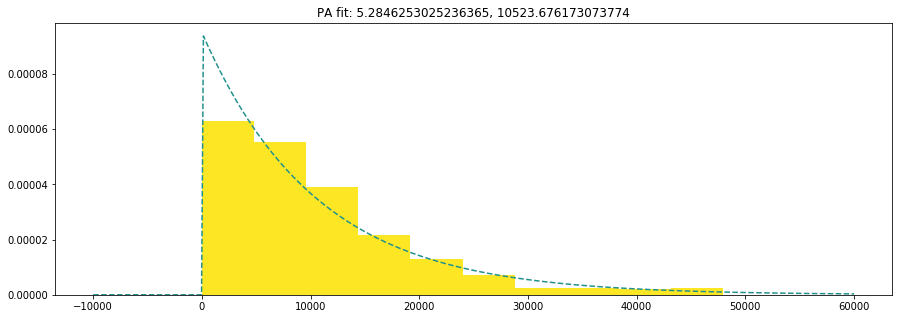

In [206]:
for s in mydoy.state.unique():
    mysub = mydoy[mydoy.state == s]
    x = mysub.value[mysub.value >0]
    plt.subplots()
    plt.hist(x, normed=True)
    xt = plt.xticks()[0]  
    xmin, xmax = min(xt), max(xt)  
    lnspc = np.linspace(xmin, xmax, len(x))
    p_fit = ss.expon.fit(x)
    rp = ss.expon.pdf(lnspc, *p_fit)
    plt.plot(lnspc, rp, ls = '--')
    plt.title(s+ ' fit: '+str(p_fit[0])+', '+ str(p_fit[1]))
plt.show()



In [186]:
### TODO

### FEATURE ENG for row diff

## model row diff

## MObility

## ADD FLU SEASON

## LSTM